In [1]:
import tensorflow as tf
import numpy as np
import keras
import os
import pandas as pd
import matplotlib.pyplot as plt

2025-02-06 13:34:43.309578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738848883.383637     491 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738848883.404733     491 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-06 13:34:43.578479: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [3]:
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy('mixed_float16')

## Loading in Saved Data

In [4]:
with open('Expanded_Normalised_Data.npy', 'rb') as f:
    x_train = np.load(f)
    y_train = np.load(f)
    x_test = np.load(f)
    y_test = np.load(f)

In [5]:
print(f"x_train: {x_train.shape} y_train:{y_train.shape}")
print(f"x_test: {x_test.shape}) y_test: {y_test.shape}")

x_train: (79757, 192, 13) y_train:(79757, 12)
x_test: (19940, 192, 13)) y_test: (19940, 12)


In [6]:
input_shape = x_train.shape[1:]
print(input_shape,y_train.shape[1])

(192, 13) 12


## Model

In [8]:
model = keras.Sequential([
    keras.Input(shape=input_shape),
    keras.layers.Conv1D(32, kernel_size=3, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv1D(64, kernel_size=3, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv1D(128, kernel_size=7, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv1D(256, kernel_size=17, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv1D(512, kernel_size=29, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),  
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation="relu"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation="relu"), 
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(y_train.shape[1]) 
])

model.summary()

#, kernel_regularizer=keras.regularizers.l2(0.01)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 190, 32)        │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 190, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 190, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 188, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 188, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 188, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 182, 128)       │        57,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 182, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 182, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 166, 256)       │       557,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 166, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 166, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 138, 512)       │     3,801,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 138, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 138, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 70656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     9,044,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,483,564 (51.44 MB)

 Trainable params: 13,481,132 (51.43 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [9]:
# model.load_weights('./checkpoint/model.weights.h5')

In [11]:
optimizer = keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss='mae', metrics=['mse'])


In [12]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./checkpoint/model.weights.h5',
    save_weights_only = True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

In [13]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=6,           
    restore_best_weights=True  
)

In [14]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',    # Quantity to be monitored.
    factor=0.1,             # Factor by which the learning rate will be reduced.
    patience=4,           # Number of epochs with no improvement after which learning rate will be reduced.
    verbose=1,              # 0: quiet, 1: update messages.
    mode='auto',            # 'auto', 'min', 'max'. In 'min' mode, lr will be reduced when the quantity monitored has stopped decreasing;
                             # in 'max' mode it will be reduced when the quantity monitored has stopped increasing;
                             # in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.
    min_delta=0.0001,      # Threshold for measuring the new optimum, to only focus on significant changes.
    cooldown=0,            # Number of epochs to wait before resuming normal operation after lr has been reduced.
    min_lr=0,               # Lower bound on the learning rate.
) # Gemini

In [15]:
# total_x_train = x_train
# total_y_train = y_train
# x_train = total_x_train[40000:]
# y_train = total_y_train[40000:]

# dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# dataset = dataset.cache().batch(24).prefetch(tf.data.AUTOTUNE)

In [ ]:
model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=16,
    # validation_split = 0.1,
    validation_data=(x_test,y_test),
    callbacks = [model_checkpoint_callback, early_stopping_callback, reduce_lr]
)

Epoch 1/50


2025-02-06 13:35:36.199096: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 796293888 exceeds 10% of free system memory.
2025-02-06 13:35:36.515219: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 796293888 exceeds 10% of free system memory.
I0000 00:00:1738848941.169979     564 service.cc:148] XLA service 0x2a0822a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738848941.170256     564 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 3GB, Compute Capability 6.1
2025-02-06 13:35:41.280751: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738848941.992523     564 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-06 13:35:46.390091: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory 

   3/4985 ━━━━━━━━━━━━━━━━━━━━ 2:24 29ms/step - loss: 1.5996 - mse: 3.6922   

2025-02-06 13:35:56.106921: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_add_multiply_reduce_fusion_1', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1738848956.180406     564 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4983/4985 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.3956 - mse: 0.4669  

2025-02-06 13:38:16.863702: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 66.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-02-06 13:38:17.318754: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


4985/4985 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3955 - mse: 0.4667

2025-02-06 13:38:27.515141: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_fusion_1', 28 bytes spill stores, 28 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_multiply_reduce_fusion', 36 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_divide_multiply_reduce_fusion_1', 24 bytes spill stores, 24 bytes spill loads

2025-02-06 13:38:29.466774: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 66.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-02-06 13:38:40.810607: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocat

4985/4985 ━━━━━━━━━━━━━━━━━━━━ 187s 34ms/step - loss: 0.3955 - mse: 0.4667 - val_loss: 0.0790 - val_mse: 0.0116 - learning_rate: 0.0010
Epoch 2/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 146s 29ms/step - loss: 0.0928 - mse: 0.0152 - val_loss: 0.0698 - val_mse: 0.0089 - learning_rate: 0.0010
Epoch 3/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 148s 30ms/step - loss: 0.0704 - mse: 0.0094 - val_loss: 0.0542 - val_mse: 0.0054 - learning_rate: 0.0010
Epoch 4/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 147s 29ms/step - loss: 0.0527 - mse: 0.0053 - val_loss: 0.0272 - val_mse: 0.0012 - learning_rate: 0.0010
Epoch 5/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 144s 29ms/step - loss: 0.0449 - mse: 0.0038 - val_loss: 0.0181 - val_mse: 5.9727e-04 - learning_rate: 0.0010
Epoch 6/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 151s 30ms/step - loss: 0.0413 - mse: 0.0032 - val_loss: 0.0149 - val_mse: 4.1833e-04 - learning_rate: 0.0010
Epoch 7/50
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 146s 29ms/step - loss: 0.0399 - mse: 0.0031 - val_loss: 0.0149 - val_mse: 3.811

In [ ]:
model.evaluate(x_test,y_test)

In [15]:
# model.save("./MPredML_2e40mae.keras")

In [18]:
# model = keras.models.load_model("./MPredML_2e40mae.keras")
# model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 239, 64)        │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 239, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 239, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 233, 128)       │        57,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 233, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 233, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 217, 256)       │       557,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 217, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 217, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 189, 512)       │     3,801,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 189, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 189, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 96768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,386,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 50,458,374 (192.48 MB)

 Trainable params: 16,818,668 (64.16 MB)

 Non-trainable params: 2,368 (9.25 KB)

 Optimizer params: 33,637,338 (128.32 MB)

In [41]:


prediction = model.predict(x_train[-1:])

# (original_max - original_min) + original_min


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


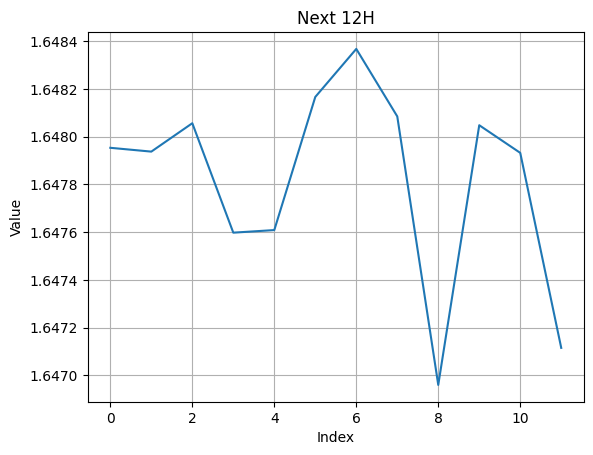

In [28]:


# Create a simple line plot
plt.plot(prediction[0])

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Next 12H")

# Add grid for better readability (optional)
plt.grid(True)

# Show the plot
plt.show()